# importing required libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# importing the dataset

In [2]:
df = pd.read_excel('daily-bike-share.xlsx')

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0
1,2.0,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0
2,3.0,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0
3,4.0,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0
4,5.0,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    float64       
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    float64       
 3   yr          731 non-null    float64       
 4   mnth        731 non-null    float64       
 5   holiday     731 non-null    float64       
 6   weekday     731 non-null    float64       
 7   workingday  731 non-null    float64       
 8   weathersit  731 non-null    float64       
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  rentals     731 non-null    float64       
dtypes: datetime64[ns](1), float64(13)
memory usage: 80.1 KB


# data preprocessing

In [5]:
df.dtypes

instant              float64
dteday        datetime64[ns]
season               float64
yr                   float64
mnth                 float64
holiday              float64
weekday              float64
workingday           float64
weathersit           float64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
rentals              float64
dtype: object

# null values and duplicate values checking

In [6]:
df.isnull()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().any().any()

False

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864


# EDA

<AxesSubplot:>

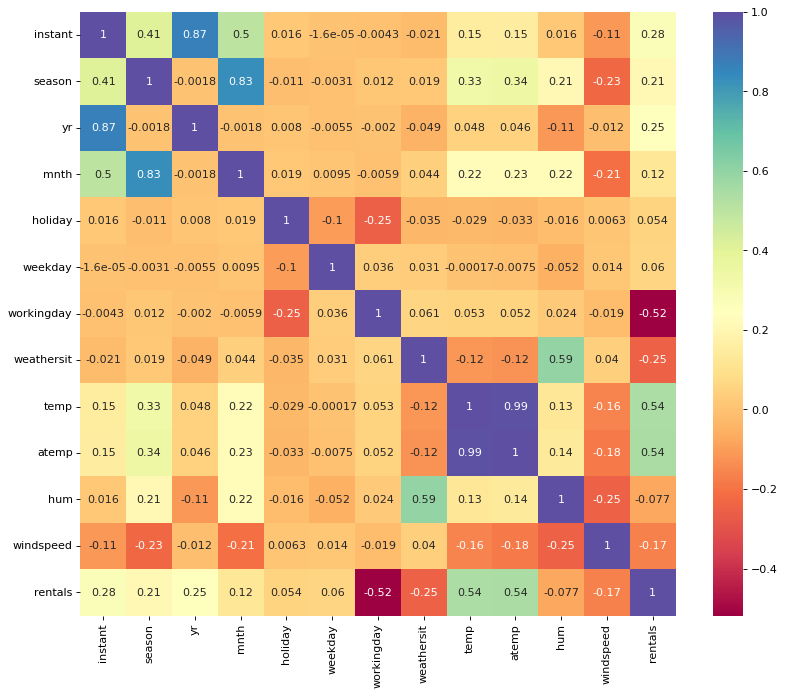

In [10]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(figsize=(12, 10), dpi=80)
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'Spectral')

# DATA VISUALIZATION

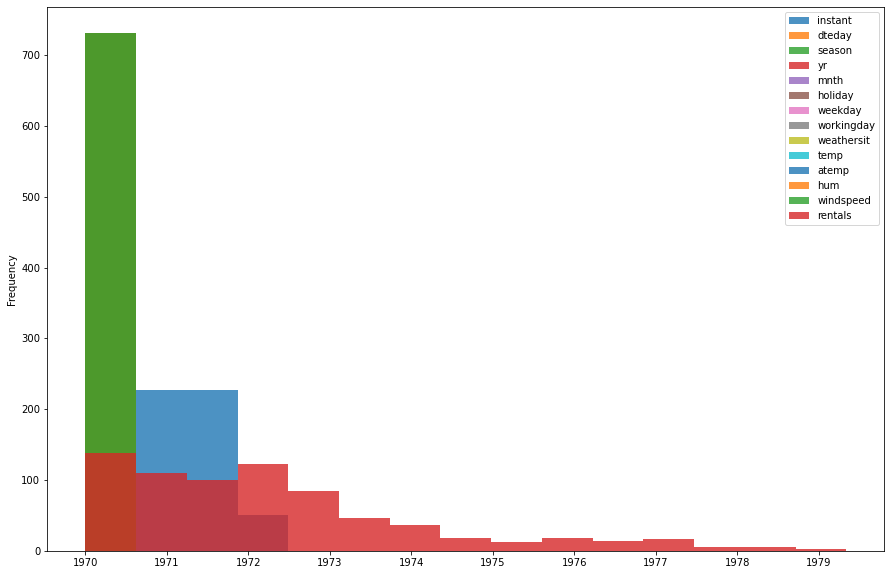

In [11]:
hist2=df.plot.hist(bins=15,alpha=0.8,figsize=(15,10))
hist2;

<AxesSubplot:>

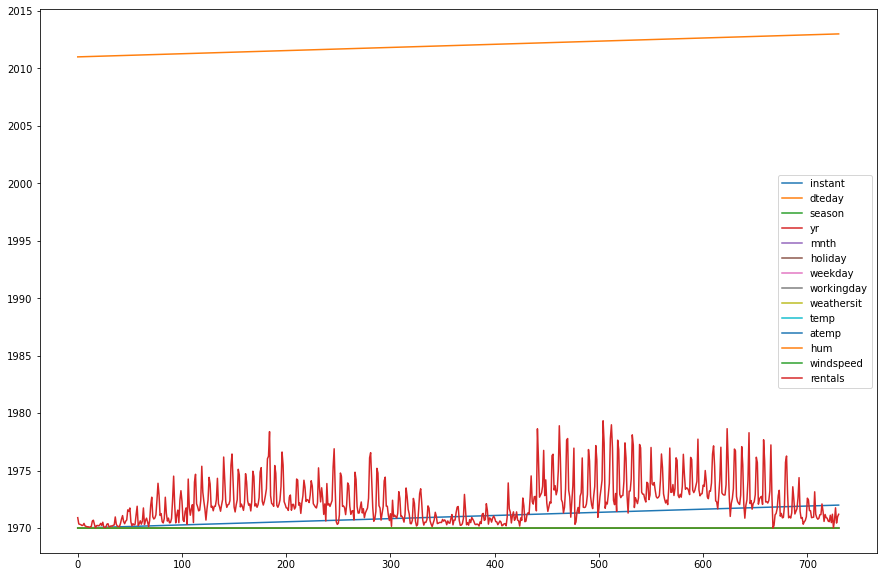

In [12]:
df.plot(figsize=(15,10))

# REMOVING NON REQUIRED COLUMNS

In [13]:
df=df.drop("dteday", axis=1)

In [14]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1.0,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0
1,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0
2,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0
3,4.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0
4,5.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0


# X AND Y VALUES CATEGORIZING

In [15]:
x=df.drop("rentals", axis=1)

In [16]:
y=df["rentals"]

In [17]:
x

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1.0,1.0,0.0,1.0,0.0,6.0,0.0,2.0,0.344167,0.363625,0.805833,0.160446
1,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539
2,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309
3,4.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,0.200000,0.212122,0.590435,0.160296
4,5.0,1.0,0.0,1.0,0.0,3.0,1.0,1.0,0.226957,0.229270,0.436957,0.186900
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727.0,1.0,1.0,12.0,0.0,4.0,1.0,2.0,0.254167,0.226642,0.652917,0.350133
727,728.0,1.0,1.0,12.0,0.0,5.0,1.0,2.0,0.253333,0.255046,0.590000,0.155471
728,729.0,1.0,1.0,12.0,0.0,6.0,0.0,2.0,0.253333,0.242400,0.752917,0.124383
729,730.0,1.0,1.0,12.0,0.0,0.0,0.0,1.0,0.255833,0.231700,0.483333,0.350754


In [18]:
y

0      331.0
1      131.0
2      120.0
3      108.0
4       82.0
       ...  
726    247.0
727    644.0
728    159.0
729    364.0
730    439.0
Name: rentals, Length: 731, dtype: float64

# SPLITTING THE DATA INTO TRAIN AND TEST

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [20]:

x_train

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
76,77.0,1.0,0.0,3.0,0.0,5.0,1.0,1.0,0.540000,0.527009,0.525217,0.231017
666,667.0,4.0,1.0,10.0,0.0,0.0,0.0,2.0,0.477500,0.467771,0.694583,0.398008
441,442.0,1.0,1.0,3.0,0.0,6.0,0.0,2.0,0.514167,0.505046,0.755833,0.110704
139,140.0,2.0,0.0,5.0,0.0,5.0,1.0,1.0,0.536667,0.529042,0.719583,0.125013
650,651.0,4.0,1.0,10.0,0.0,5.0,1.0,1.0,0.437500,0.433071,0.539167,0.235092
...,...,...,...,...,...,...,...,...,...,...,...,...
645,646.0,4.0,1.0,10.0,0.0,0.0,0.0,2.0,0.415833,0.419813,0.708333,0.141162
715,716.0,4.0,1.0,12.0,0.0,0.0,0.0,2.0,0.362500,0.369938,0.838750,0.100742
72,73.0,1.0,0.0,3.0,0.0,1.0,1.0,1.0,0.325217,0.332000,0.496957,0.136926
235,236.0,3.0,0.0,8.0,0.0,3.0,1.0,1.0,0.673333,0.630692,0.605000,0.253108


In [21]:
y_train

76      884.0
666     998.0
441    3155.0
139     909.0
650    1060.0
        ...  
645     781.0
715     538.0
72      359.0
235     949.0
37      120.0
Name: rentals, Length: 584, dtype: float64

# linear regression

In [22]:
from sklearn import datasets, linear_model, metrics

In [23]:
linearreg= linear_model.LinearRegression()

In [24]:
linearreg.fit(x_train, y_train)

LinearRegression()

In [25]:
y_pred=linearreg.predict(x_test)

In [36]:
mae = metrics.mean_absolute_error(y_test, y_pred)

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = mse**0.5 

r2 = metrics.r2_score(y_test, y_pred)

print(f"""
MAE of linear regression: \t{mae:.2f}
RMSE of linear regression: \t{rmse:.2f}
""")


MAE of linear regression: 	277.29
RMSE of linear regression: 	391.82



In [37]:
print(f"""
r2 of linear regression : \t{r2:.2f}
""")


r2 of linear regression : 	0.62



# random forest regression

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
randomregressor = RandomForestRegressor()

In [40]:
randomregressor.fit(x_train, y_train) 

RandomForestRegressor()

In [41]:
rfr_pred = randomregressor.predict(x_test) 

In [42]:
mae = metrics.mean_absolute_error(y_test, rfr_pred)

mse = metrics.mean_squared_error(y_test, rfr_pred)
rmse = mse**0.5 

r2 = metrics.r2_score(y_test, rfr_pred)

print(f"""
MAE of random forest: \t{mae:.2f}
RMSE of random forest: \t{rmse:.2f}
""")


MAE of random forest: 	178.51
RMSE of random forest: 	274.57



In [43]:
print(f"""
r2 of random forest : \t{r2:.2f}
""")


r2 of random forest : 	0.82

